Today's lecture will be a whirlwind tour of some of the major topics to be covered in this course. Don't worry if you don't understand everything. We will cover all of these topics in much more detail later.

* [Data Visualization](#Data-Visualization)
* [Data Transformation](#Data-Transformation)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Strings](#Strings)
* [Dates and Times](#Dates-and-Times)
* [Functions](#Functions)
* [Vectors](#Vectors)
* [Iteration](#Iteration)

## Data Visualization

Let us first import the `tidyverse` package using the `library` command

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Let us examine the `mpg` **data frame**.

In [2]:
library(dslabs)
data(stars)
stars = as_tibble(stars)
print(stars)

# A tibble: 96 x 4
   star           magnitude  temp type 
   <fct>              <dbl> <int> <chr>
 1 Sun                  4.8  5840 G    
 2 SiriusA              1.4  9620 A    
 3 Canopus             -3.1  7400 F    
 4 Arcturus            -0.4  4590 K    
 5 AlphaCentauriA       4.3  5840 G    
 6 Vega                 0.5  9900 A    
 7 Capella             -0.6  5150 G    
 8 Rigel               -7.2 12140 B    
 9 ProcyonA             2.6  6580 F    
10 Betelgeuse          -5.7  3200 M    
# … with 86 more rows


As we can see this data frame (actually it is a **tibble**, a newer type of data frame) has 96 observations (rows) and 4 variables (columns). Only the first 10 rows are displayed above.

The official documentation of the `dslabs` package that contains the `stars` dataset describes the columns as follows.

- `star` Name of star.
- `magnitude` Absolute magnitude of the star, which is a function of the star’s luminosity and distance to the star.
- `temp` Surface temperature in degrees Kelvin (K).
- `type` Spectral class of star in the OBAFGKM system.

Let us examine the relationship between `magnitude` and `temp`

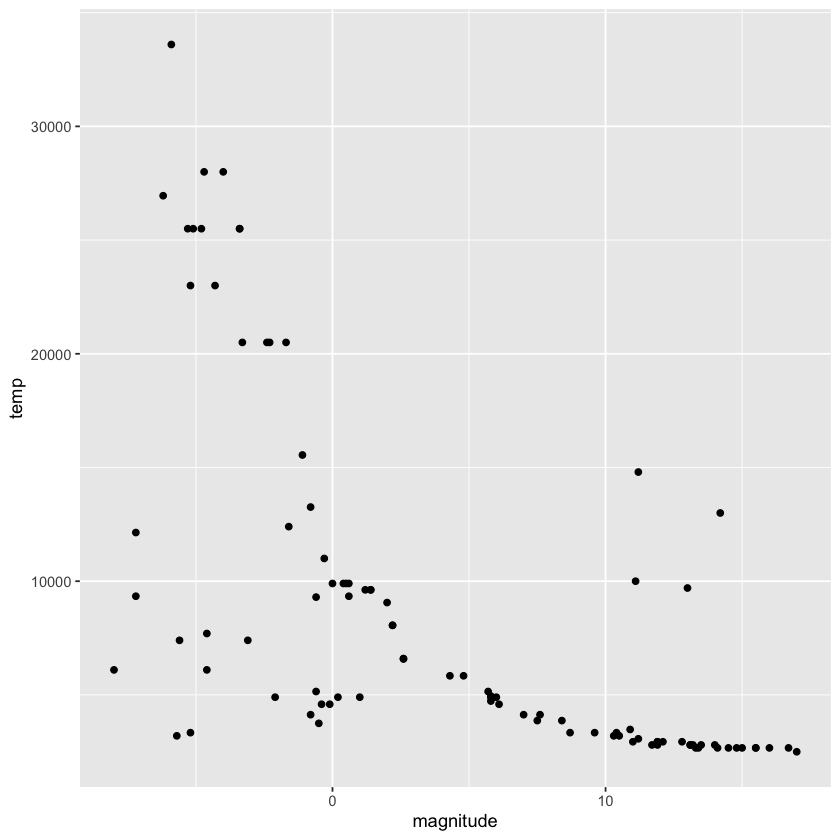

In [3]:
ggplot(data = stars) +
    geom_point(mapping = aes(x = magnitude, y = temp))

Interesting! It seems that higher `magnitude` values correspond to lower `temp` values. Astronomers define `magnitude` on a logarithmic scale. The star Vega is used as reference and its `magnitude` is defined as 0. A star of `magnitude` $m$ is about 2.5 times **brighter** than a star of `magnitude` $m+1$.

Let us also plot the `type` of stars by using it as the `color` attribute of dots.

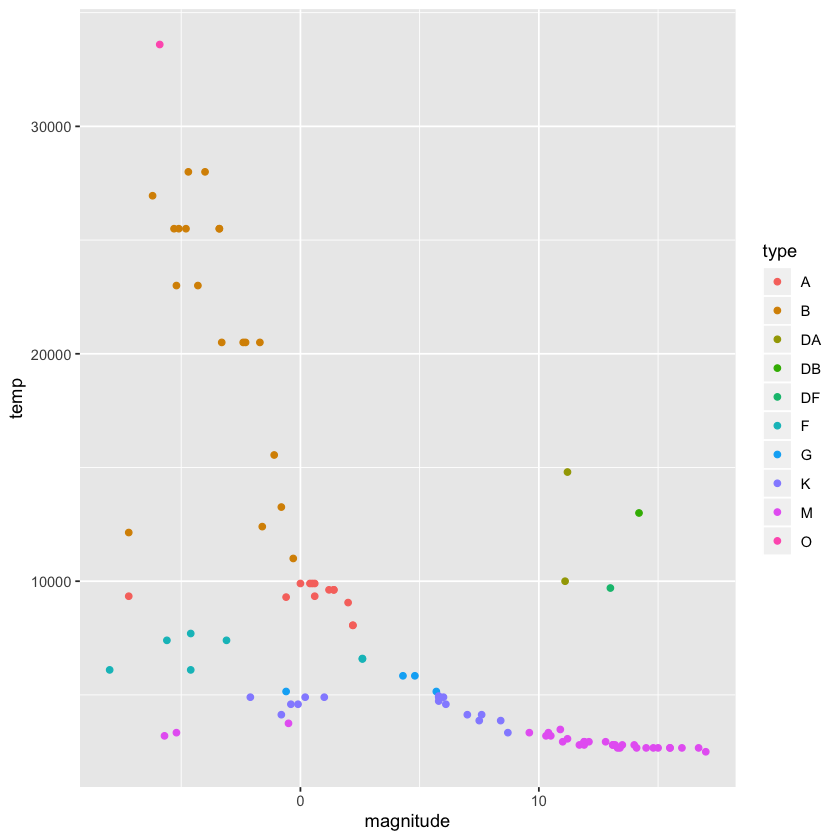

In [4]:
ggplot(data = stars) +
    geom_point(mapping = aes(x = magnitude, y = temp, color = type))

The type O star at the top left is the hottest whereas the type M stars at the bottom right are the coldest.

## Data Transformation

Let us load the `brexit_polls` dataset.

In [5]:
data(brexit_polls)
polls = as_tibble(brexit_polls)
print(polls)

# A tibble: 127 x 9
   startdate  enddate    pollster poll_type samplesize remain leave undecided
   <date>     <date>     <fct>    <fct>          <dbl>  <dbl> <dbl>     <dbl>
 1 2016-06-23 2016-06-23 YouGov   Online          4772   0.52  0.48      0   
 2 2016-06-22 2016-06-22 Populus  Online          4700   0.55  0.45      0   
 3 2016-06-20 2016-06-22 YouGov   Online          3766   0.51  0.49      0   
 4 2016-06-20 2016-06-22 Ipsos M… Telephone       1592   0.49  0.46      0.01
 5 2016-06-20 2016-06-22 Opinium  Online          3011   0.44  0.45      0.09
 6 2016-06-17 2016-06-22 ComRes   Telephone       1032   0.54  0.46      0   
 7 2016-06-17 2016-06-22 ComRes   Telephone       1032   0.48  0.42      0.11
 8 2016-06-16 2016-06-22 TNS      Online          2320   0.41  0.43      0.16
 9 2016-06-20 2016-06-20 Survati… Telephone       1003   0.45  0.44      0.11
10 2016-06-18 2016-06-19 YouGov   Online          1652   0.42  0.44      0.13
# … with 117 more rows, and 1 more variable:

Let us see how the column `undecided`, the fraction of undecided voters, looks over time.

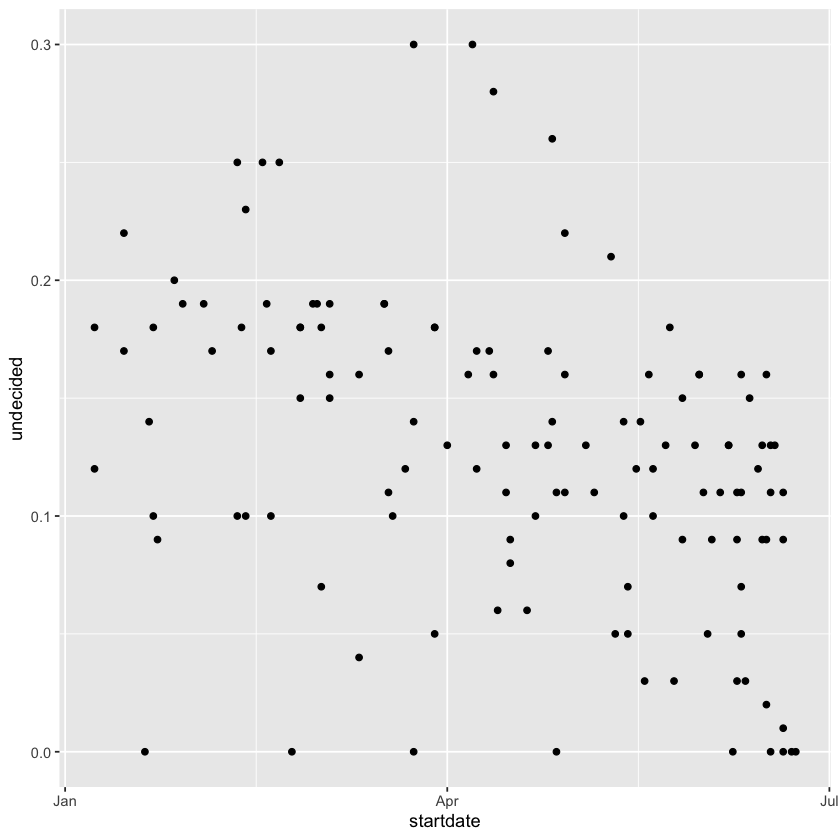

In [6]:
ggplot(data = polls) + geom_point(mapping = aes(x = startdate, y = undecided))

Oops! This does not seem to show any trend. Let us see if switching to `geom_smooth`, another available geometry in `ggplot2`, helps us see a trend.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



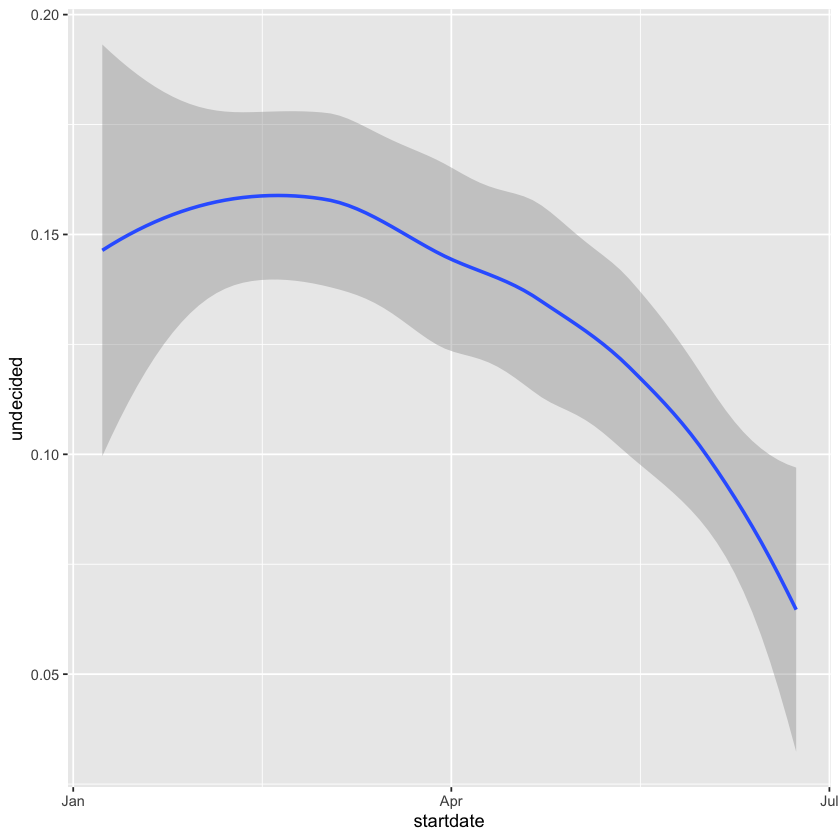

In [7]:
ggplot(data = polls) + geom_smooth(mapping = aes(x = startdate, y = undecided))

Ok, so this seems to suggest that the fraction of undecided voter went down with time.

Now let us look at who was conducting these polls, i.e., the `pollster` column.

In [8]:
poll_counts <- group_by(polls, pollster) %>% summarize(count = n())
print(poll_counts)

# A tibble: 16 x 2
   pollster                          count
   <fct>                             <int>
 1 BMG Research                          7
 2 ComRes                               10
 3 Greenberg Quinlan Rosner Research     1
 4 ICM                                  28
 5 Ipsos MORI                            7
 6 Opinium                               9
 7 ORB                                  14
 8 ORB/Telegraph                         1
 9 Panelbase                             1
10 Populus                               1
11 Populus/Number Cruncher Politics      4
12 Survation                             7
13 Survation/IG Group                    1
14 TNS                                   9
15 YouGov                               26
16 YouGov/The Times                      1


There are a few counts of 1. Let us find how many.

In [9]:
filter(poll_counts, count == 1) %>% print()

# A tibble: 6 x 2
  pollster                          count
  <fct>                             <int>
1 Greenberg Quinlan Rosner Research     1
2 ORB/Telegraph                         1
3 Panelbase                             1
4 Populus                               1
5 Survation/IG Group                    1
6 YouGov/The Times                      1


Let us add a new row `Other` with a count of 6.

In [10]:
poll_counts <- add_row(filter(poll_counts, count > 1), pollster='Other', count=6)
print(poll_counts)

# A tibble: 11 x 2
   pollster                         count
   <fct>                            <dbl>
 1 BMG Research                         7
 2 ComRes                              10
 3 ICM                                 28
 4 Ipsos MORI                           7
 5 Opinium                              9
 6 ORB                                 14
 7 Populus/Number Cruncher Politics     4
 8 Survation                            7
 9 TNS                                  9
10 YouGov                              26
11 Other                                6


Let us make a pie chart!

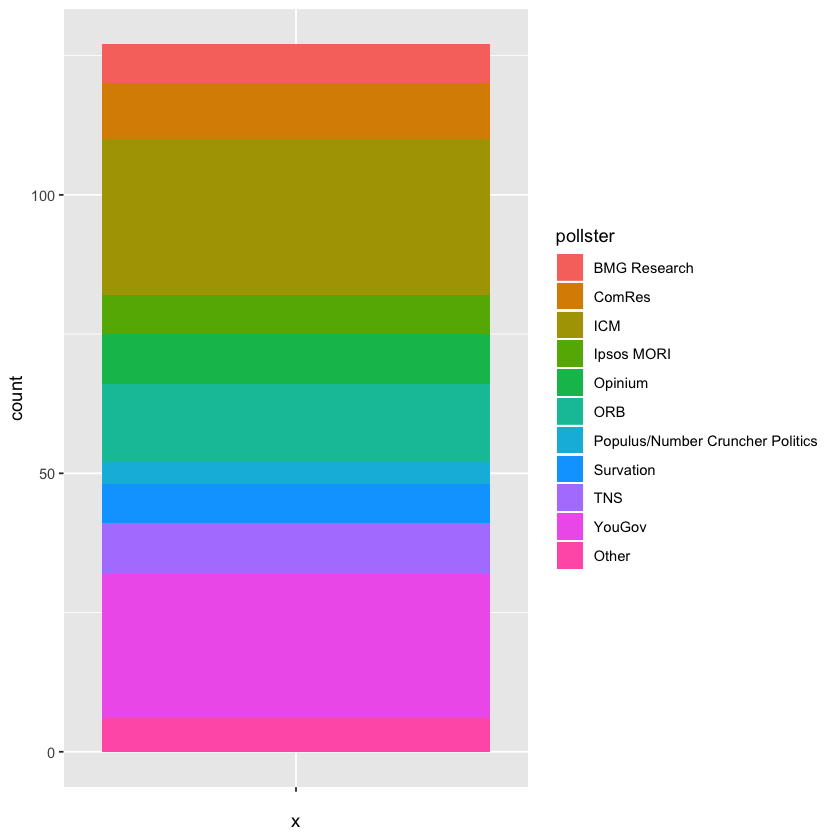

In [11]:
bp <- ggplot(poll_counts, aes(x="", y=count, fill=pollster)) + geom_bar(width = 1, stat = "identity")
bp

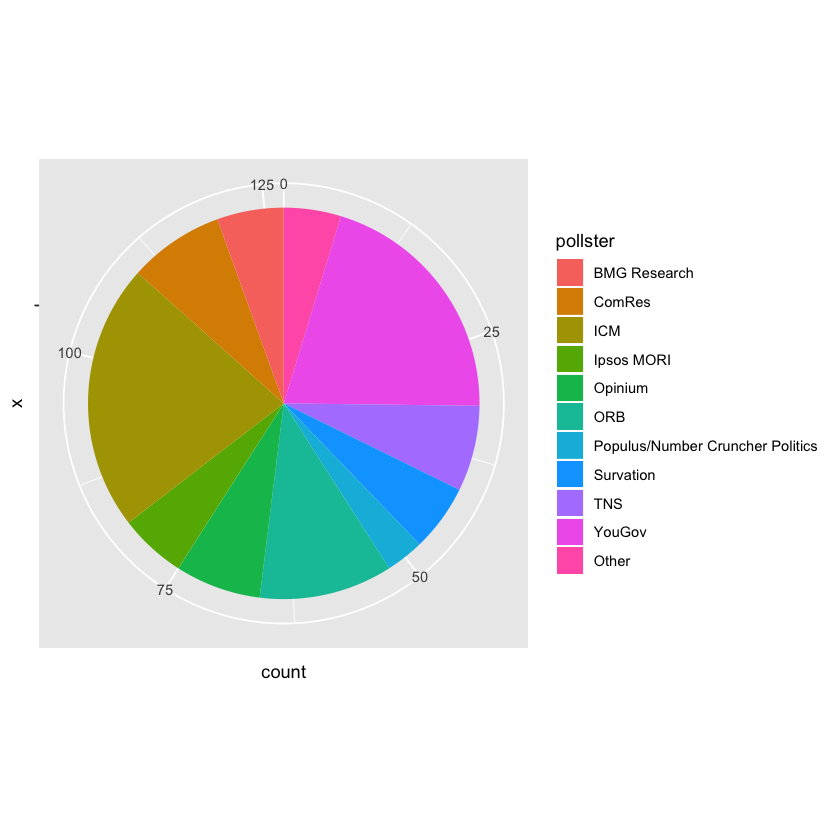

In [12]:
pie <- bp + coord_polar("y", start=0)
pie

## Exploratory Data Analysis

Let us now look at `diamonds`, a dataset containing the prices and other information about almost 54,000 diamonds.

In [12]:
print(diamonds)

# A tibble: 53,940 x 10
   carat       cut color clarity depth table price     x     y     z
   <dbl>     <ord> <ord>   <ord> <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23     Ideal     E     SI2  61.5    55   326  3.95  3.98  2.43
 2  0.21   Premium     E     SI1  59.8    61   326  3.89  3.84  2.31
 3  0.23      Good     E     VS1  56.9    65   327  4.05  4.07  2.31
 4  0.29   Premium     I     VS2  62.4    58   334  4.20  4.23  2.63
 5  0.31      Good     J     SI2  63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good     J    VVS2  62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good     I    VVS1  62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good     H     SI1  61.9    55   337  4.07  4.11  2.53
 9  0.22      Fair     E     VS2  65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good     H     VS1  59.4    61   338  4.00  4.05  2.39
# ... with 53,930 more rows


Let us try to understand the relationship between the price of a diamond and its weight in carats.

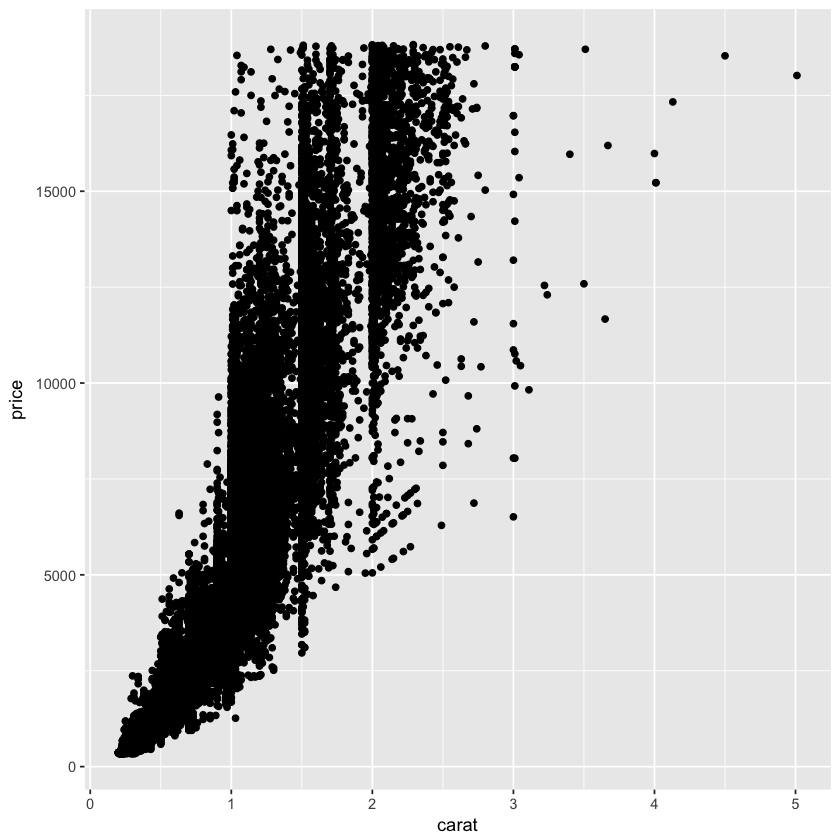

In [13]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat, y = price))

A standard scatterplot that `geom_point` draws is not very useful for very large datasets. We can change the geometry to `bin2d` that creates rectangular regions and uses full color to show how many points landed in each bin.

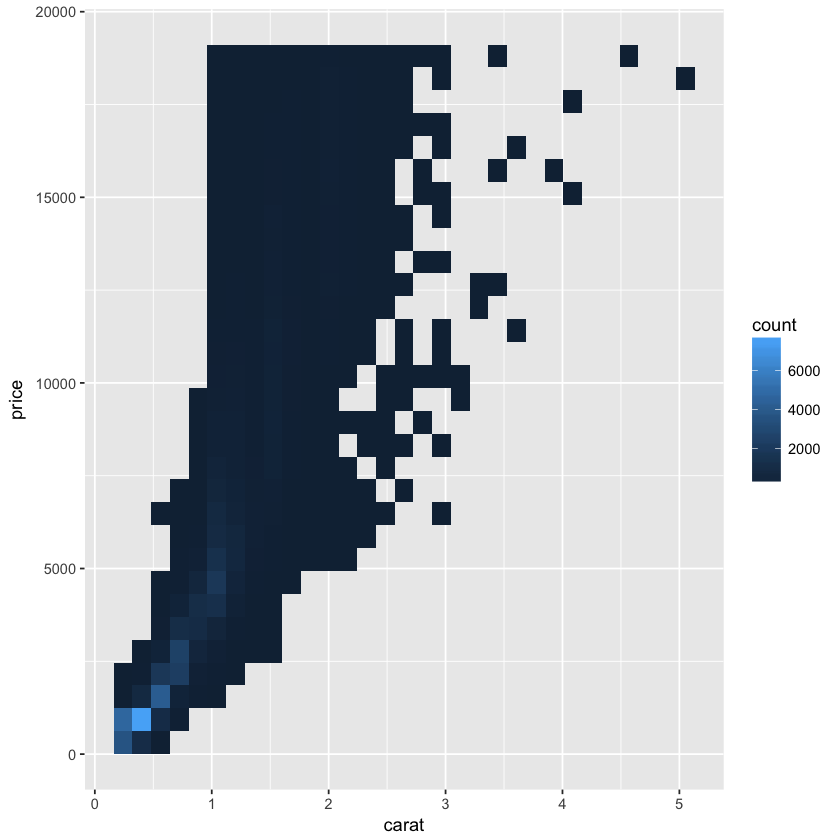

In [14]:
ggplot(data = diamonds) + 
  geom_bin2d(mapping = aes(x = carat, y = price))

We can also choose hexagonal bins.

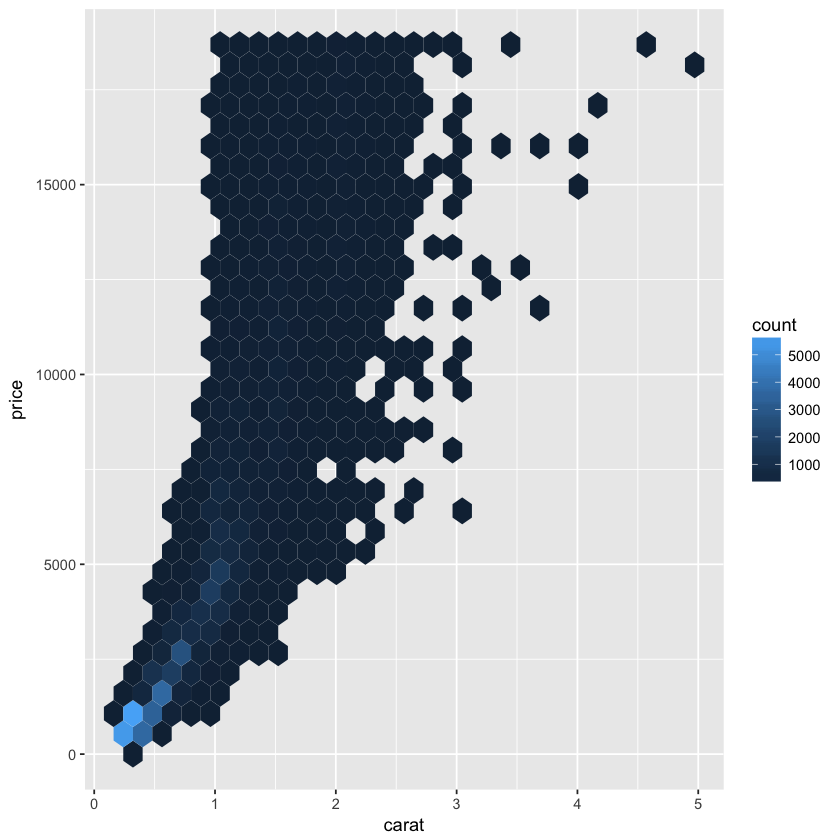

In [15]:
ggplot(data = diamonds) + 
  geom_hex(mapping = aes(x = carat, y = price))

We can also use `geom_smooth` to create a smooth plot of how price varies as a function of weight in carats. 

`geom_smooth()` using method = 'gam'


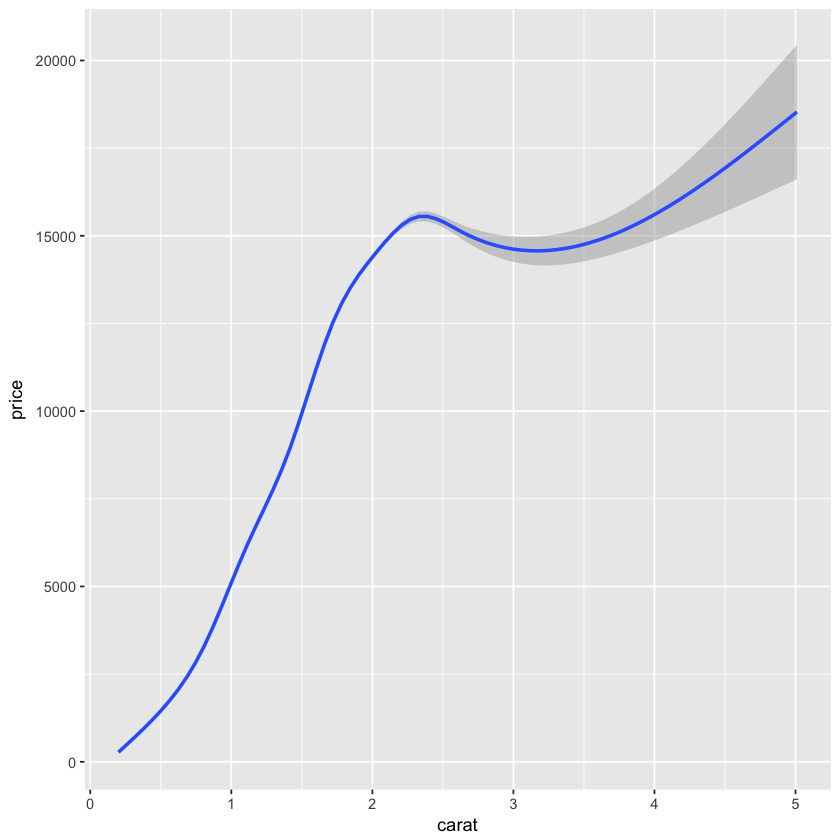

In [16]:
ggplot(data = diamonds) + 
  geom_smooth(mapping = aes(x = carat, y = price))

What about the relationship between `price` and `cut`? Since `cut` is a categorical variable, let us use a **boxplot** using the `geom_boxplot` geometry.

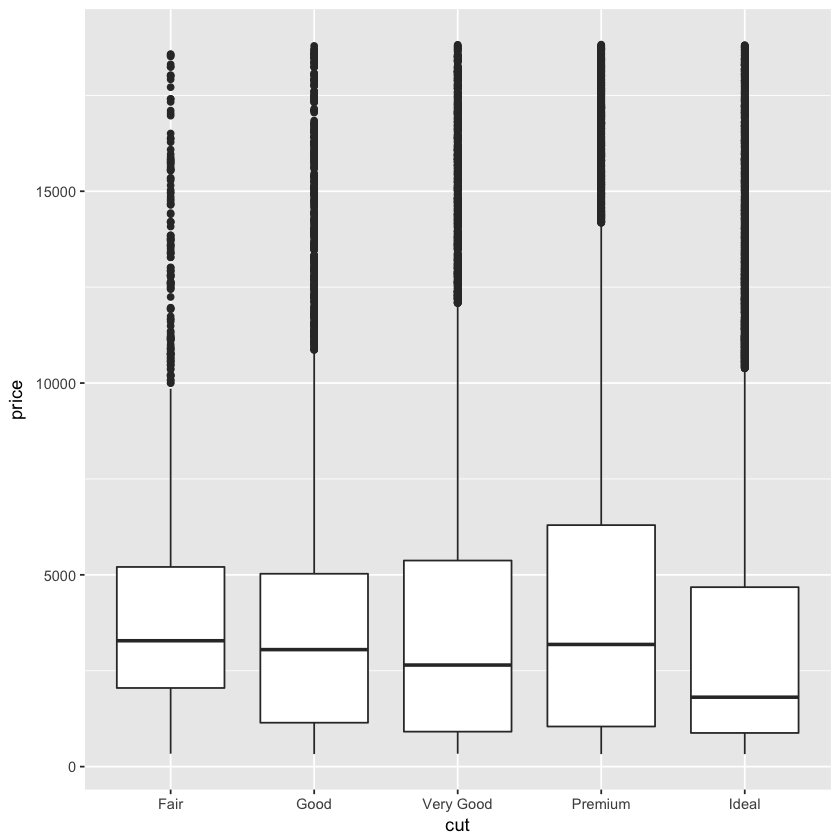

In [17]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = cut, y = price))

Hmmm. That looks strange. We might expect price to go up as the quality increases but here the lowest quality diamonds seems to be the most expensive! This is because fair quality diamonds are also larger and larger diamonds tend to be more expensive. Let's plot `carat` versus `cut`.

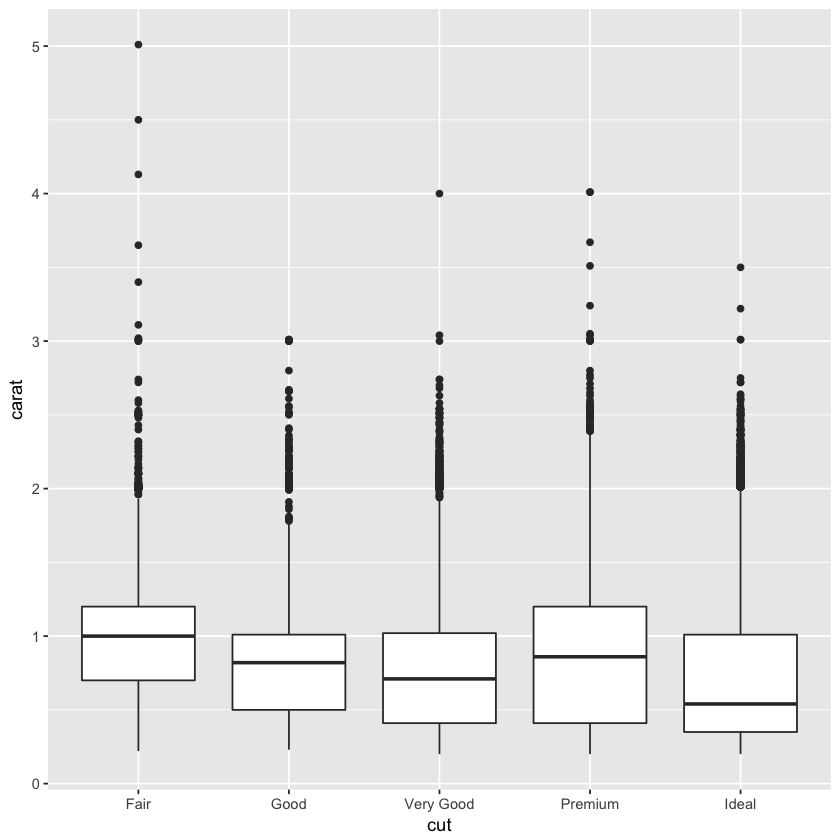

In [18]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = cut, y = carat))

As you can see, untangling the relationship between even just 3 variables can be hard. We haven't even looked at two other "C's" yet -- color and clarity!

## Strings

Strings are sequences of characters and store textual data. Let us load the `stringr` package that supports string manipulation.

In [19]:
library(stringr)

All string manipulation functions in `stringr` start with `str_`. Here's how to compute the length of a string.

In [20]:
str_length("This is a string.")

[1] 17

`str_c` can be used to join, or **concatenate**, strings.

In [21]:
str_c("Birds of a feather","flock together.")

[1] "Birds of a featherflock together."

Oops, that didn't put a space in between. We can add it using the `sep` argument.

In [22]:
str_c("Birds of a feather","flock together.", sep=" ")

[1] "Birds of a feather flock together."

We can **sort** strings in alphabetic order.

In [23]:
data_science_languages = c("R", "Python", "Scala", "Julia")
str_sort(data_science_languages)

[1] "Julia"  "Python" "R"      "Scala"

We can look for patterns in strings using `str_view`. For example, let us try to find a very simple pattern -- the letter "a" -- in the language names above.

In [24]:
str_view(data_science_languages, "a")

HTML widgets cannot be represented in plain text (need html)

`str_view` matches only the first occurence of a pattern. To match all occurrences, we can use `str_view_all`

In [25]:
str_view_all(data_science_languages, "a")

HTML widgets cannot be represented in plain text (need html)

To find a pattern only at the end of a strong, we can use the anchor "$" that matches the end of a string.

In [26]:
str_view(data_science_languages, "a$")

HTML widgets cannot be represented in plain text (need html)

If we only want to find out whether a pattern matches a string, we can use `str_detect`. The the code below `[aeiou]` is a group that matches any letter in the given group, in this case all 5 vowels in the English alphabet.

In [27]:
str_detect(data_science_languages, "[aeiou]")

[1] FALSE  TRUE  TRUE  TRUE

## Dates and Times

The `lubridate` package helps us work with dates and times.

In [28]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Here's how to get today's date as a date object and the current time as a date-time object.

In [29]:
today()
now()

[1] "2017-08-28"

[1] "2017-08-28 15:13:12 IST"

In [30]:
flights_dt_raw = select(flights, year, month, day, hour, minute)
print(flights_dt_raw)

# A tibble: 336,776 x 5
    year month   day  hour minute
   <int> <int> <int> <dbl>  <dbl>
 1  2013     1     1     5     15
 2  2013     1     1     5     29
 3  2013     1     1     5     40
 4  2013     1     1     5     45
 5  2013     1     1     6      0
 6  2013     1     1     5     58
 7  2013     1     1     6      0
 8  2013     1     1     6      0
 9  2013     1     1     6      0
10  2013     1     1     6      0
# ... with 336,766 more rows


In [31]:
flights_dt <- mutate(flights_dt_raw, departure = make_datetime(year, month, day, hour, minute))
print(flights_dt)

# A tibble: 336,776 x 6
    year month   day  hour minute           departure
   <int> <int> <int> <dbl>  <dbl>              <dttm>
 1  2013     1     1     5     15 2013-01-01 05:15:00
 2  2013     1     1     5     29 2013-01-01 05:29:00
 3  2013     1     1     5     40 2013-01-01 05:40:00
 4  2013     1     1     5     45 2013-01-01 05:45:00
 5  2013     1     1     6      0 2013-01-01 06:00:00
 6  2013     1     1     5     58 2013-01-01 05:58:00
 7  2013     1     1     6      0 2013-01-01 06:00:00
 8  2013     1     1     6      0 2013-01-01 06:00:00
 9  2013     1     1     6      0 2013-01-01 06:00:00
10  2013     1     1     6      0 2013-01-01 06:00:00
# ... with 336,766 more rows


We can now plot a histogram of flight counts by departure time. We will use a binwidth of a day.

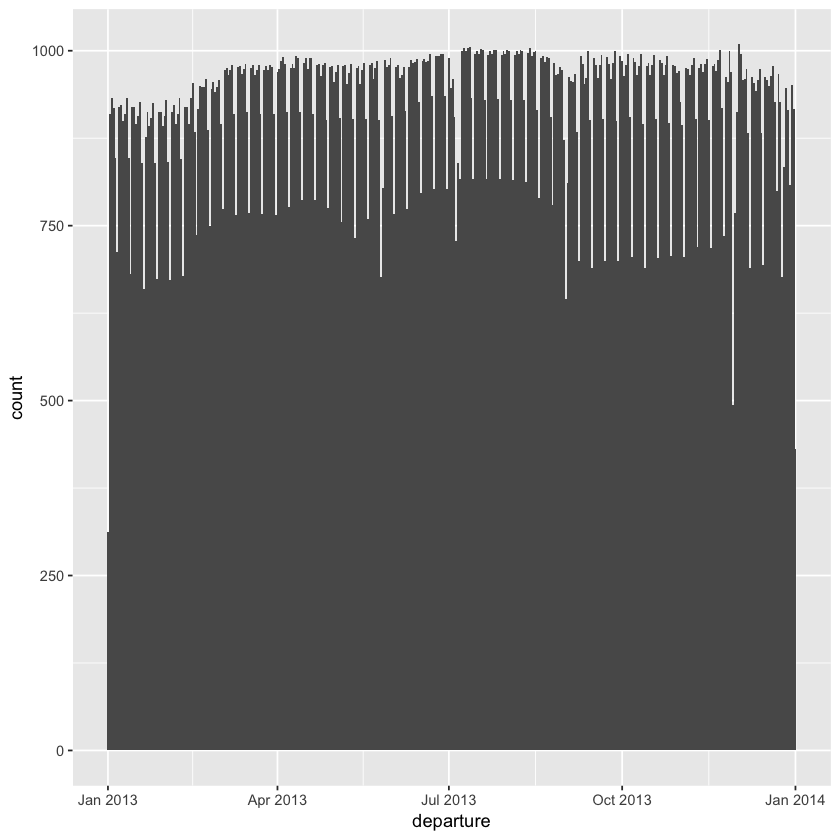

In [32]:
ggplot(data = flights_dt) +
  geom_histogram(mapping=aes(x = departure), binwidth=24*60*60)  # bin width for date-time is in seconds

What do those dips correspond to? Let us look more closely at data only from January.

In [33]:
flights_dt_jan = filter(flights_dt, departure < ymd(20130201))

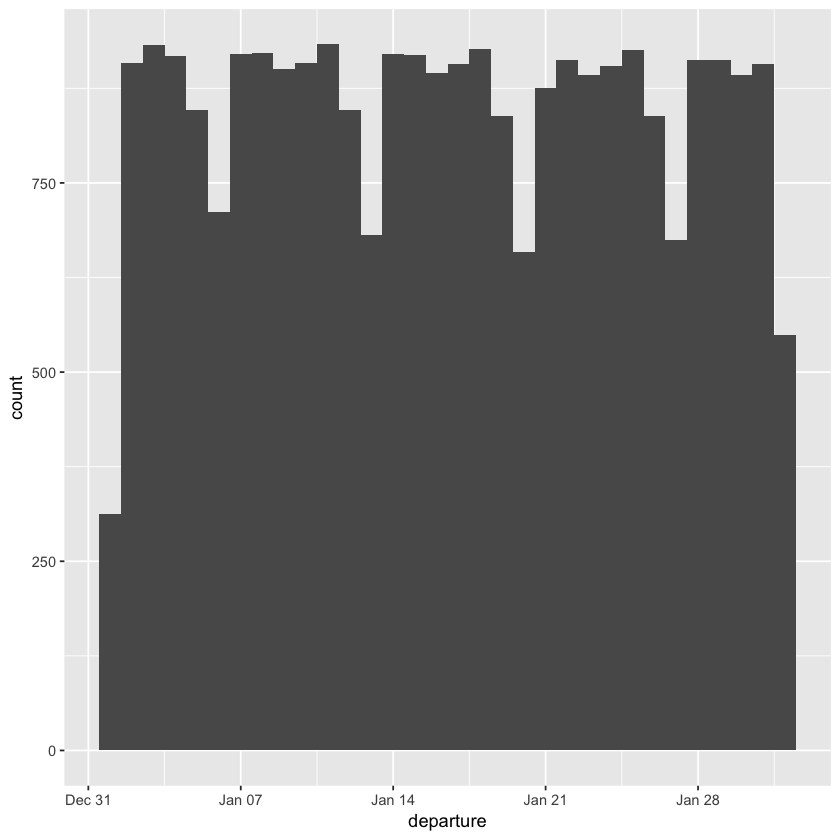

In [34]:
ggplot(data = flights_dt_jan) +
  geom_histogram(mapping=aes(x = departure), binwidth=24*60*60)  # bin width for date-time is in seconds

We see fewer flights on Jan 6, 13, 20, 27. These must be Sundays. Let us check.

In [35]:
wday(ymd(20130106), label=TRUE, abbr=FALSE)

[1] Sunday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

## Functions

Functions are the most basic mechanism for code reuse. If you find yourself copying and pasting code more than twice, you probably want to think about writing a function. Then, later changes only need to be done in one place and not in all the many places where you copied your code.

In [36]:
say_hello <- function(x) {
    str_c("Hello ", x, "!")
}

In [37]:
say_hello("World")

[1] "Hello World!"

In [38]:
say_hello("America")

[1] "Hello America!"

In [39]:
say_hello("STATS 306")

[1] "Hello STATS 306!"

`say_hello` is the **name** of our function. `x` is the **argument** to the function and the code between the curly brackets `{` and `}` is the **body** of the function.

Let's see what happens when we don't provide an argument.

In [40]:
say_hello()

ERROR: Error in str_c("Hello ", x, "!"): argument "x" is missing, with no default


We can supply the **default** value of argument as the code below shows.

In [41]:
say_hello <- function(x = "there") {
    str_c("Hello ", x, "!")
}

If we suply the argument, the function works as before.

In [42]:
say_hello('friends')

[1] "Hello friends!"

If we don't, it uses the default argument.

In [43]:
say_hello()

[1] "Hello there!"

Let's see what happens when we pass along the empty string "" as an argument to `say_hello`.

In [44]:
say_hello("")

[1] "Hello !"

Perhaps, we don't like the space between "Hello" and "!" in this case. So we will add a check to see if the argument is an empty string.

In [45]:
say_hello <- function(x = "there") {
    if (str_length(x) == 0) {
        "Hello!"
    } else {
        str_c("Hello ", x, "!")
    }
}

In [46]:
say_hello("")

[1] "Hello!"

We just saw an instance of **conditional execution** of code using the `if` statement.

## Vectors

R has two types of vectors:

**Atomic vectors**: These are homogeneous in the sense that every element is of the same type. For example, logical, integer, double, character.

**Lists**: These are heterogenous in the sense that different elements can be of different types. In particular, a list can contain another list.

In [47]:
(my_lgl_vector <- 1:10 %% 2 == 1) # TRUE if odd, FALSE if even

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE

In [48]:
typeof(my_lgl_vector)

[1] "logical"

In [49]:
length(my_lgl_vector)

[1] 10

In [50]:
(my_dbl_vector <- 1:10 / 100)

[1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10

In [51]:
sqrt(my_dbl_vector)

[1] 0.1000000 0.1414214 0.1732051 0.2000000 0.2236068 0.2449490 0.2645751
 [8] 0.2828427 0.3000000 0.3162278

In [52]:
sqrt(my_dbl_vector) ^ 2

[1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10

In [53]:
sqrt(my_dbl_vector) ^ 2 == my_dbl_vector

[1] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [54]:
near(sqrt(my_dbl_vector) ^ 2, my_dbl_vector)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

## Iteration

**Iteration** is an important concept in programming. It refers to doing the same operations repeatedly. Let us consider the famous *Fibonacci sequence* whose $n$th term is defined as

$$ F(n+1) = F(n) + F(n-1) $$

starting with $F(1) = 0$ and $F(2) = 1$.

The code below computes the first 10 Fibonacci numbers using a **for loop**.

In [55]:
previous = 0
current = 1
for (i in 1:10) {
    print(previous)
    new = current + previous
    previous = current
    current = new
}

[1] 0
[1] 1
[1] 1
[1] 2
[1] 3
[1] 5
[1] 8
[1] 13
[1] 21
[1] 34


What if we want to print all Fibonacci numbers less than 1000. We do not know how long that will take. To iterate a computation as long as some condition is true, we can use a **while loop**.

In [56]:
previous = 0
current = 1
while (previous < 1000) {
    print(previous)
    new = current + previous
    previous = current
    current = new
}

[1] 0
[1] 1
[1] 1
[1] 2
[1] 3
[1] 5
[1] 8
[1] 13
[1] 21
[1] 34
[1] 55
[1] 89
[1] 144
[1] 233
[1] 377
[1] 610
[1] 987
